In [4]:
import json
import os
import csv
import re

import math
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf       # for ANOVA
import statsmodels.stats.multicomp as multi # for post hoc test 
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
import scipy.spatial.distance as distance
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import skew
from pyquaternion import Quaternion
from matplotlib.backends.backend_pdf import PdfPages

from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
import math
import sys
import subprocess

# Import analysis Scripts
# import nbimporter
# import Analysis_Util as analysis_util


pd.set_option('display.max_columns', None)  
sns.set()

In [38]:
alldata = pd.read_csv("result_3.csv")

In [94]:
pivotdata = alldata.pivot("Sequence", "Function")
pivotdata = pivotdata.reset_index(drop=True)

# Convert to non multi-level index
pivotdata.columns = pivotdata.columns.droplevel(0)

In [95]:
# Add verify columnb
pivotdata["Verify"] = pivotdata.VerifyProof - pivotdata.Proof
pivotdata["Sequence"] = pivotdata.index

In [105]:
# Melt the data
meltdata = pd.melt(pivotdata, id_vars=["Sequence"])
meltdata = meltdata.reset_index()

# Data Analysis

In [125]:
pivotdata.describe()

Function,Proof,VerifyProof,Verify,Sequence
count,100.000000,100.000000,100.000000,100.000000
mean,1.089218,2.455485,1.366267,49.500000
std,0.190403,0.243804,0.331706,29.011492
min,0.812312,2.072331,0.521617,0.000000
25%,0.957181,2.263430,1.173422,24.750000
50%,1.057255,2.429312,1.355135,49.500000
75%,1.185050,2.576702,1.584384,74.250000
max,1.727037,3.438067,2.479897,99.000000


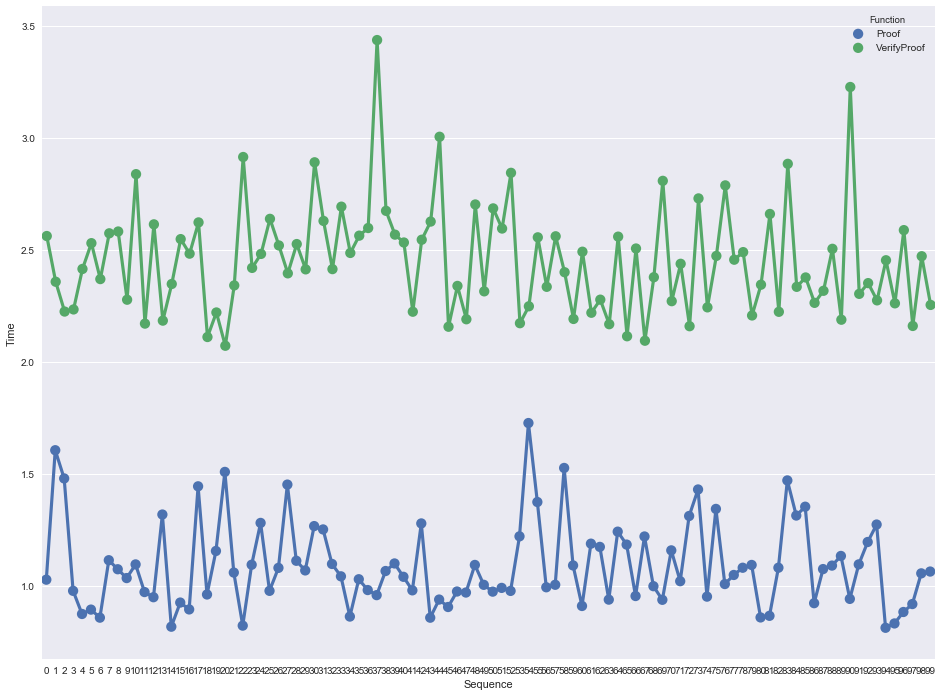

In [79]:
plt.figure(figsize=(16, 12))
ax = sns.pointplot(x="Sequence", y="Time", hue="Function",# col="TargetType", #col="isOccluded",
                   data=alldata, dodge=True, estimator=np.median, capsize=.1)

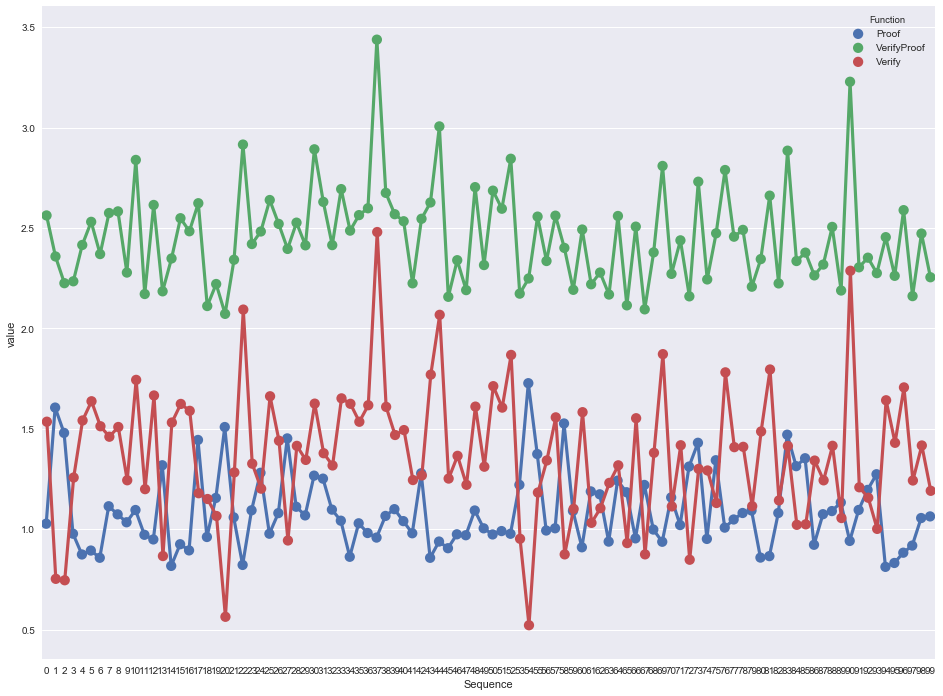

In [106]:
plt.figure(figsize=(16, 12))
ax = sns.pointplot(x="Sequence", y="value", hue="Function",# col="TargetType", #col="isOccluded",
                   data=meltdata, dodge=True, estimator=np.median, capsize=.1)

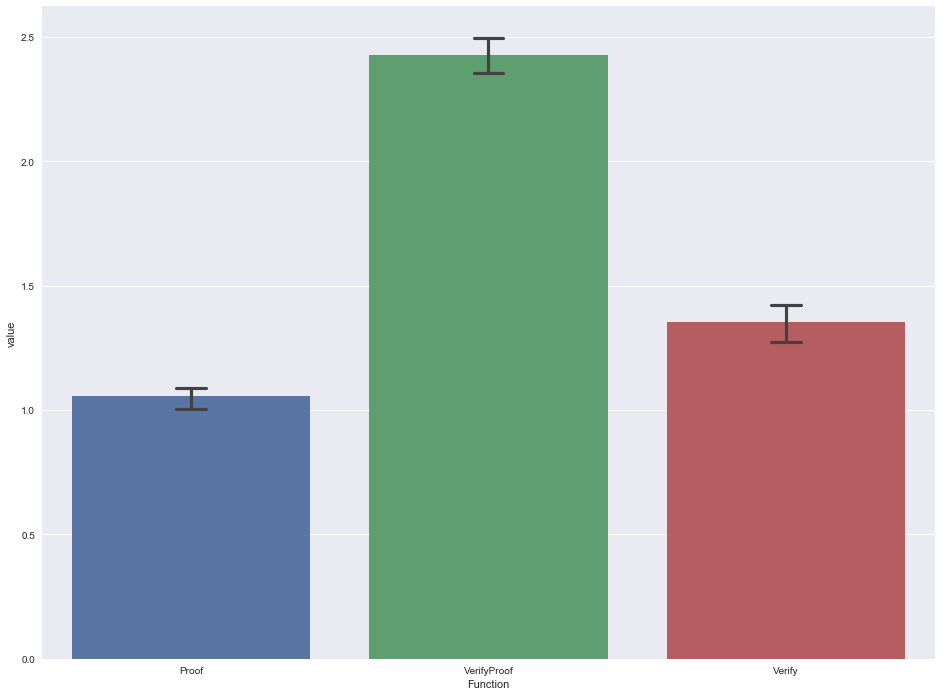

In [122]:
plt.figure(figsize=(16, 12))
ax = sns.barplot(x="Function", y="value", #hue="isOccluded",# col="TargetType", #col="isOccluded",
                   data=meltdata, dodge=True, estimator=np.median, capsize=.1)

In [104]:
pd.melt(pivotdata, id_vars=["Sequence"])

,Sequence,Function,value
0,0,Proof,1.027271
1,1,Proof,1.605637
2,2,Proof,1.479525
3,3,Proof,0.977371
4,4,Proof,0.874021
5,5,Proof,0.893554
6,6,Proof,0.857558
7,7,Proof,1.114228
8,8,Proof,1.073844
9,9,Proof,1.034421


In [110]:
pivotdata

Function,Proof,VerifyProof,Verify,Sequence
0,1.027271,2.562529,1.535258,0
1,1.605637,2.358292,0.752655,1
2,1.479525,2.225157,0.745632,2
3,0.977371,2.234567,1.257196,3
4,0.874021,2.415497,1.541476,4
5,0.893554,2.530668,1.637114,5
6,0.857558,2.370172,1.512614,6
7,1.114228,2.574682,1.460454,7
8,1.073844,2.582761,1.508917,8
9,1.034421,2.278040,1.243619,9


In [113]:
sns.load_dataset("gammas")

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
5,0.0,IPS,5,-0.073709
6,0.0,IPS,6,3.542734
7,0.0,IPS,7,0.080169
8,0.0,IPS,8,1.547083
9,0.0,IPS,9,2.827153
